<a href="https://colab.research.google.com/github/shahreyaryawar/Sentiment-Analysis-R-Programming/blob/master/all_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import math

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/shahreyar

/content/drive/MyDrive/shahreyar


In [ ]:
!ls

all_code.ipynb	EWS_197.csv	      Inference_70.csv	lr.pkl	xgb.pkl
ce_ohe.pkl	infer_data_final.csv  knn.pkl		rf.pkl


In [ ]:
EWS_data= pd.read_csv('EWS_197.csv')

In [ ]:
EWS_data.head(10)

,ID,Status,Age,Campus,Gender,Compa,Leaves,Ratings,Promotion,Potential,Performance
0,1,1,23,1,1,0.686,17,3.000000,1,4.0,4.0
1,2,1,25,1,1,0.733,18,4.000000,0,5.0,4.5
2,3,1,24,0,1,0.389,4,4.500000,1,5.0,4.5
3,4,1,26,0,1,0.622,16,3.000000,1,4.0,4.0
4,5,1,27,1,1,0.857,25,3.000000,1,3.5,3.5
5,6,1,23,1,1,1.086,17,4.250000,0,3.5,3.5
6,7,1,27,1,1,0.673,30,3.583333,0,4.0,4.0
7,8,1,26,0,1,0.673,21,3.250000,2,3.0,3.0
8,9,1,24,0,1,1.067,17,3.750000,1,3.5,3.5
9,10,1,24,1,1,1.229,25,4.500000,1,4.5,4.0


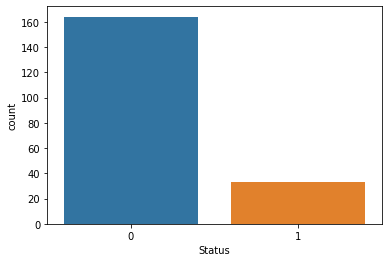

In [ ]:
#Analyzing Data
sns.countplot(x= "Status", data= EWS_data)

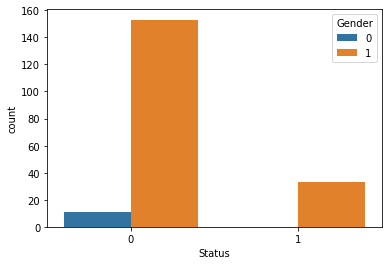

In [ ]:
sns.countplot(x= "Status",hue= "Gender", data= EWS_data)

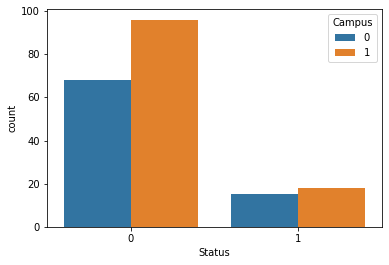

In [ ]:
sns.countplot(x= "Status",hue= "Campus", data= EWS_data)

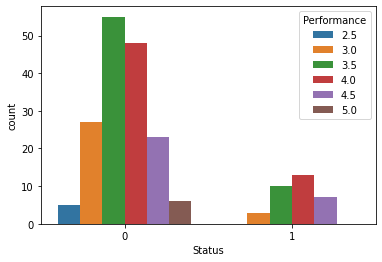

In [ ]:
sns.countplot(x= "Status",hue= "Performance", data= EWS_data)

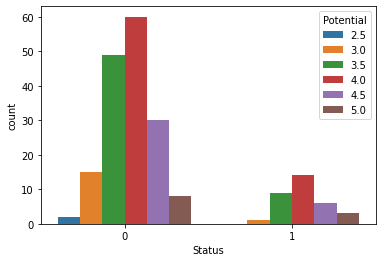

In [ ]:
sns.countplot(x= "Status",hue= "Potential", data= EWS_data)

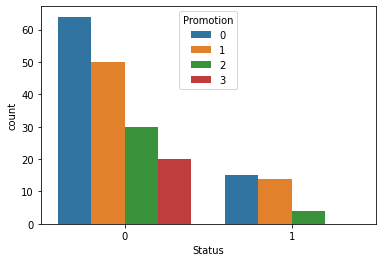

In [ ]:
sns.countplot(x= "Status",hue= "Promotion", data= EWS_data)

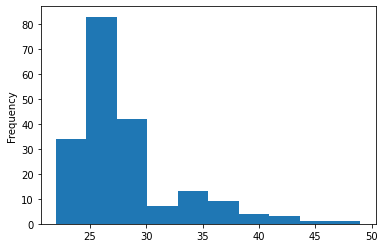

In [ ]:
EWS_data["Age"].plot.hist()

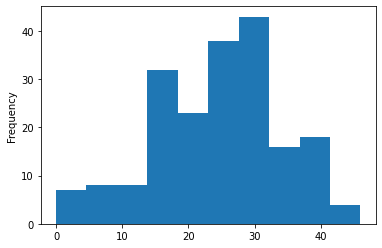

In [ ]:
EWS_data["Leaves"].plot.hist()

In [ ]:
EWS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           197 non-null    int64  
 1   Status       197 non-null    int64  
 2   Age          197 non-null    int64  
 3   Campus       197 non-null    int64  
 4   Gender       197 non-null    int64  
 5   Compa        197 non-null    float64
 6   Leaves       197 non-null    int64  
 7   Ratings      197 non-null    float64
 8   Promotion    197 non-null    int64  
 9   Potential    197 non-null    float64
 10  Performance  197 non-null    float64
dtypes: float64(4), int64(7)
memory usage: 17.1 KB


In [ ]:
#Data wrangling
EWS_data.isnull().sum()

ID             0
Status         0
Age            0
Campus         0
Gender         0
Compa          0
Leaves         0
Ratings        0
Promotion      0
Potential      0
Performance    0
dtype: int64

In [ ]:
EWS_data.head()

,ID,Status,Age,Campus,Gender,Compa,Leaves,Ratings,Promotion,Potential,Performance
0,1,1,23,1,1,0.686,17,3.0,1,4.0,4.0
1,2,1,25,1,1,0.733,18,4.0,0,5.0,4.5
2,3,1,24,0,1,0.389,4,4.5,1,5.0,4.5
3,4,1,26,0,1,0.622,16,3.0,1,4.0,4.0
4,5,1,27,1,1,0.857,25,3.0,1,3.5,3.5


In [ ]:
ohe_features= ["Potential", "Performance"]

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 80 kB 8.0 MB/s 


In [ ]:
from category_encoders import one_hot
import joblib

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
EWS_data[ohe_features] = EWS_data[ohe_features].astype('str')

In [ ]:
EWS_data[ohe_features].dtypes

Potential      object
Performance    object
dtype: object

In [ ]:
def OneHot(df,feature_list = ohe_features,mode=None):
    if mode=='train':
        ce_ohe = one_hot.OneHotEncoder(use_cat_names = True)
        ce_dummies = ce_ohe.fit_transform(df[feature_list])
        #joblib.dump(ce_ohe, 'ce_ohe.pkl')

        # Train
        print(df.shape,ce_dummies.shape, end='||')
        df = pd.concat([df.reset_index(drop=True), ce_dummies.reset_index(drop=True)],axis=1)
        print(df.shape, end='||')
        df.drop(columns=feature_list,inplace=True)
        print(df.shape)
        return df
        
    if mode=='infer':
        # Test
        ce_ohe = joblib.load('ce_ohe.pkl')
        ce_dummies = ce_ohe.transform(df[feature_list])
        df = pd.concat([df.reset_index(drop=True), ce_dummies.reset_index(drop=True)],axis=1)
        df.drop(columns=feature_list,inplace=True)
        return df

In [ ]:
df_train= OneHot(EWS_data,feature_list = ohe_features,mode= "train")

(197, 11) (197, 12)||(197, 23)||(197, 21)


In [ ]:
EWS_data.head()

,ID,Status,Age,Campus,Gender,Compa,Leaves,Ratings,Promotion,Potential,Performance
0,1,1,23,1,1,0.686,17,3.0,1,4.0,4.0
1,2,1,25,1,1,0.733,18,4.0,0,5.0,4.5
2,3,1,24,0,1,0.389,4,4.5,1,5.0,4.5
3,4,1,26,0,1,0.622,16,3.0,1,4.0,4.0
4,5,1,27,1,1,0.857,25,3.0,1,3.5,3.5


In [ ]:
pd.set_option('display.max_columns',100)

In [ ]:
print(EWS_data['Performance'].value_counts().sort_index())
print(EWS_data['Potential'].value_counts().sort_index())

2.5     5
3.0    30
3.5    65
4.0    61
4.5    30
5.0     6
Name: Performance, dtype: int64
2.5     2
3.0    16
3.5    58
4.0    74
4.5    36
5.0    11
Name: Potential, dtype: int64


In [ ]:
df_train.shape

(197, 21)

In [ ]:
df_train.head()

,ID,Status,Age,Campus,Gender,Compa,Leaves,Ratings,Promotion,Potential_4.0,Potential_5.0,Potential_3.5,Potential_3.0,Potential_4.5,Potential_2.5,Performance_4.0,Performance_4.5,Performance_3.5,Performance_3.0,Performance_5.0,Performance_2.5
0,1,1,23,1,1,0.686,17,3.0,1,1,0,0,0,0,0,1,0,0,0,0,0
1,2,1,25,1,1,0.733,18,4.0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,3,1,24,0,1,0.389,4,4.5,1,0,1,0,0,0,0,0,1,0,0,0,0
3,4,1,26,0,1,0.622,16,3.0,1,1,0,0,0,0,0,1,0,0,0,0,0
4,5,1,27,1,1,0.857,25,3.0,1,0,0,1,0,0,0,0,0,1,0,0,0


In [ ]:
#Train data
X = df_train.drop(columns=["Status","ID"],axis=1)
print(X.shape)
y = df_train["Status"]
print(y.shape)

(197, 19)
(197,)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, random_state=100, stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [ ]:
models = {'lr':LogisticRegression(max_iter=600),
          'rf':RandomForestClassifier(),
          'knn':KNeighborsClassifier(n_neighbors=5),
          'xgb':XGBClassifier(learning_rate = 0.005, n_estimators=50, max_depth=2)}

In [ ]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.834395
1    0.165605
Name: Status, dtype: float64
0    0.825
1    0.175
Name: Status, dtype: float64


In [ ]:
for model_name, model in models.items():
    print(f'------------{model_name}---------')
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    probabilities = model.predict_proba(X_test)[:, 1]
    print(f'Accuracy : {accuracy_score(y_test, predictions)}')
    print(classification_report(y_test, predictions))
    print(confusion_matrix(y_test, predictions))
    print(f'ROC AUC : {roc_auc_score(y_test, probabilities)}')
   # with open(model_name+'.pkl','wb') as obj:
     # joblib.dump(model, obj)

------------lr---------
Accuracy : 0.85
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        33
           1       1.00      0.14      0.25         7

    accuracy                           0.85        40
   macro avg       0.92      0.57      0.58        40
weighted avg       0.87      0.85      0.80        40

[[33  0]
 [ 6  1]]
ROC AUC : 0.6103896103896104
------------rf---------
Accuracy : 0.875
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        33
           1       1.00      0.29      0.44         7

    accuracy                           0.88        40
   macro avg       0.93      0.64      0.69        40
weighted avg       0.89      0.88      0.84        40

[[33  0]
 [ 5  2]]
ROC AUC : 0.6558441558441558
------------knn---------
Accuracy : 0.775
              precision    recall  f1-score   support

           0       0.82      0.94      0.87        33
           1      

In [ ]:
ls

ce_ohe.pkl  EWS_197.csv  Inference_70.csv  knn.pkl  lr.pkl  rf.pkl  xgb.pkl


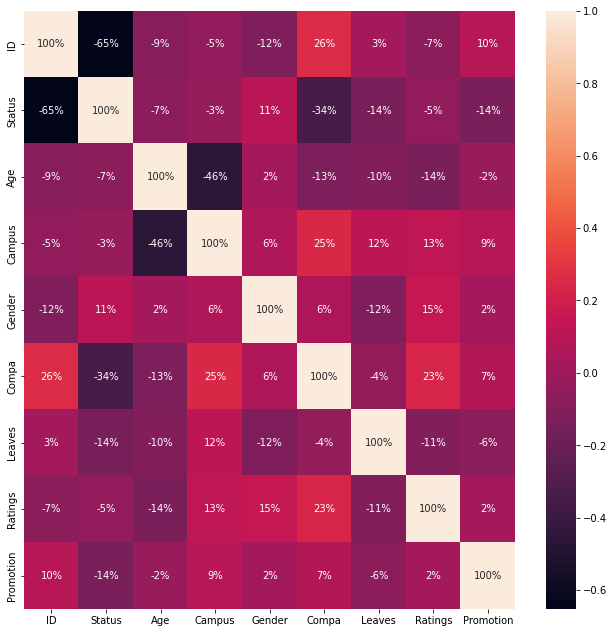

In [ ]:
#Visualize the correlation
plt.figure(figsize=(11,11))  #14in by 14in
sns.heatmap(EWS_data.corr(), annot=True, fmt='.0%')

In [ ]:
def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

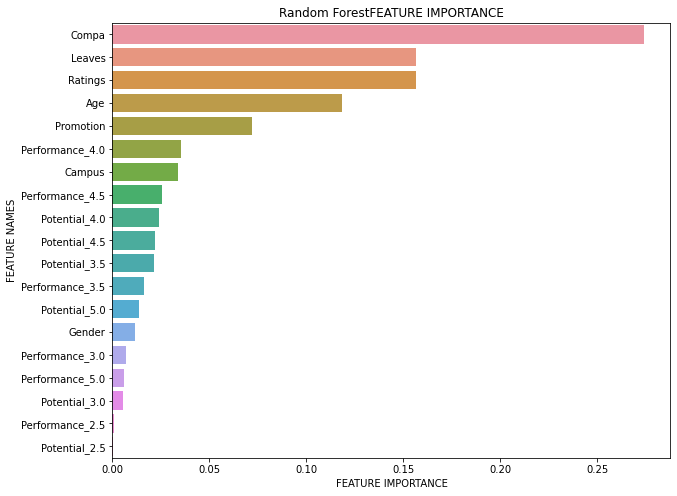

In [ ]:
plot_feature_importance(models['rf'].feature_importances_,X_train.columns,'Random Forest')

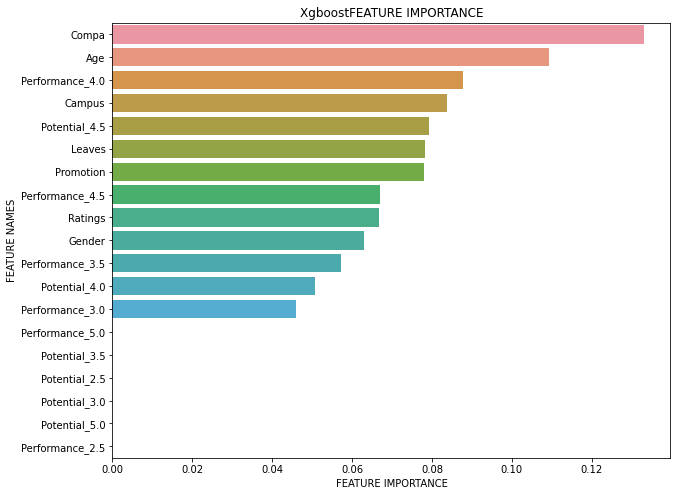

In [ ]:
plot_feature_importance(models['xgb'].feature_importances_,X_train.columns,'Xgboost')

In [ ]:
pip install shap 

     |████████████████████████████████| 564 kB 8.6 MB/s 


In [ ]:
import shap 

In [ ]:
explainer = shap.TreeExplainer(models['xgb'])
shap_values = explainer.shap_values(X_train)

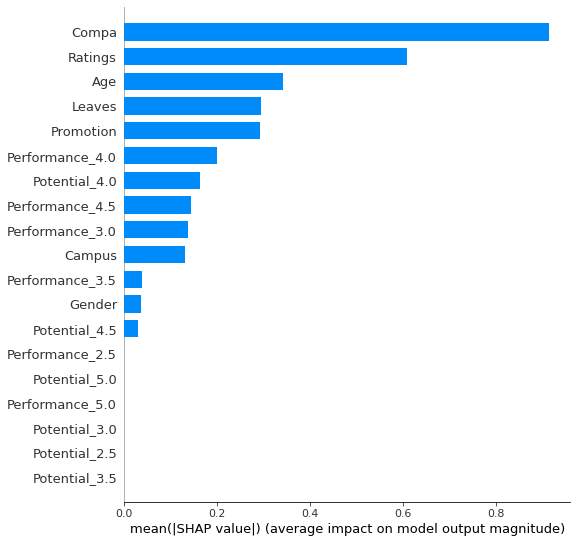

In [ ]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

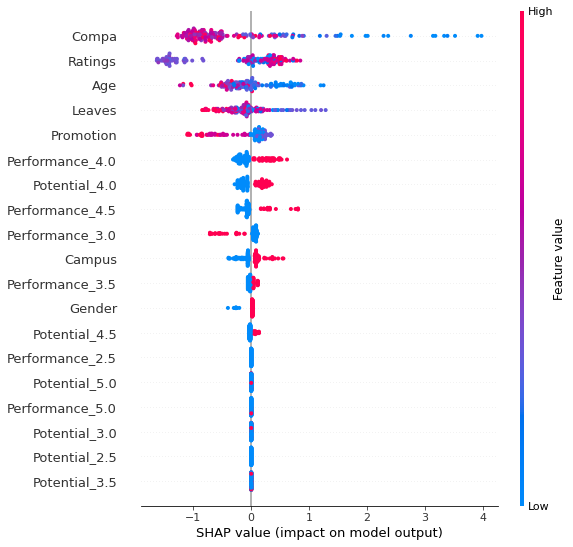

In [ ]:
shap.summary_plot(shap_values, X_train)

In [ ]:
!ls

ce_ohe.pkl  EWS_197.csv  Inference_70.csv


In [ ]:
# Inference

infer_data = pd.read_csv('Inference_70.csv')
ohe_features= ["Potential", "Performance"]
infer_data[ohe_features] = infer_data[ohe_features].astype('str')

In [ ]:
infer_data[ohe_features].dtypes

Potential      object
Performance    object
dtype: object

In [ ]:
infer_data.isna().sum()

ID             0
Age            0
Campus         0
Gender         0
Compa          0
Leaves         0
Ratings        0
Promotion      0
Potential      0
Performance    0
dtype: int64

In [ ]:
# One hot 
df_infer = OneHot(infer_data,feature_list = ohe_features,mode= "infer")

In [ ]:
df_infer['Gender'] = df_infer['Gender'].map({'M':1,'F':0})

In [ ]:
infer_data.head()

,ID,Age,Campus,Gender,Compa,Leaves,Ratings,Promotion,Potential,Performance
0,4,28,0,M,0.783,21,4.000000,2,3.5,4.0
1,6,35,0,M,0.976,27,3.083333,3,3.0,3.0
2,7,27,0,M,0.720,15,3.333333,1,4.0,4.0
3,8,26,0,F,1.000,37,2.500000,1,2.5,3.0
4,9,28,0,M,0.967,29,4.000000,1,4.0,3.5


In [ ]:
df_infer.head()

,Age,Campus,Gender,Compa,Leaves,Ratings,Promotion,Potential_4.0,Potential_5.0,Potential_3.5,Potential_3.0,Potential_4.5,Potential_2.5,Performance_4.0,Performance_4.5,Performance_3.5,Performance_3.0,Performance_5.0,Performance_2.5
0,28,0,1,0.783,21,4.000000,2,0,0,1,0,0,0,1,0,0,0,0,0
1,35,0,1,0.976,27,3.083333,3,0,0,0,1,0,0,0,0,0,1,0,0
2,27,0,1,0.720,15,3.333333,1,1,0,0,0,0,0,1,0,0,0,0,0
3,26,0,0,1.000,37,2.500000,1,0,0,0,0,0,1,0,0,0,1,0,0
4,28,0,1,0.967,29,4.000000,1,1,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
!ls

all_code.ipynb	EWS_197.csv	      Inference_70.csv	lr.pkl	xgb.pkl
ce_ohe.pkl	infer_data_final.csv  knn.pkl		rf.pkl


In [ ]:
df_infer.drop(columns='ID',inplace=True)

In [ ]:
# Predictions on Inference Data
model = joblib.load('rf.pkl')
predictions = model.predict(df_infer)    # for 1/0
probabilities = model.predict_proba(df_infer)[:,1]           # b/w 0 and 1

In [ ]:
probabilities

array([0.35, 0.02, 0.67, 0.09, 0.36, 0.49, 0.3 , 0.13, 0.16, 0.06, 0.62,
       0.09, 0.11, 0.28, 0.31, 0.38, 0.06, 0.05, 0.34, 0.28, 0.11, 0.05,
       0.35, 0.02, 0.25, 0.36, 0.1 , 0.36, 0.01, 0.1 , 0.23, 0.12, 0.09,
       0.11, 0.16, 0.22, 0.15, 0.19, 0.01, 0.22, 0.06, 0.39, 0.38, 0.15,
       0.1 , 0.27, 0.  , 0.04, 0.09, 0.23, 0.22, 0.31, 0.16, 0.15, 0.12,
       0.05, 0.14, 0.02, 0.09, 0.2 , 0.03, 0.37, 0.09, 0.2 , 0.04, 0.34,
       0.15, 0.3 , 0.31, 0.09])

In [ ]:
infer_data['Predictions'] = predictions
infer_data['Probabilities'] = probabilities

In [ ]:
infer_data.to_csv('infer_data_rf.csv',index=False)

In [ ]:
# Predictions on Inference Data
model = joblib.load('xgb.pkl')
predictions = model.predict(df_infer)    # for 1/0
probabilities = model.predict_proba(df_infer)[:,1]           # b/w 0 and 1

In [ ]:
infer_data['Predictions'] = predictions
infer_data['Probabilities'] = probabilities

In [ ]:
infer_data

,ID,Age,Campus,Gender,Compa,Leaves,Ratings,Promotion,Potential,Performance,Predictions,Probabilities
0,4,28,0,M,0.783,21,4.000000,2,3.5,4.0,0,0.414657
1,6,35,0,M,0.976,27,3.083333,3,3.0,3.0,0,0.428247
2,7,27,0,M,0.720,15,3.333333,1,4.0,4.0,1,0.579377
3,8,26,0,F,1.000,37,2.500000,1,2.5,3.0,0,0.428247
4,9,28,0,M,0.967,29,4.000000,1,4.0,3.5,0,0.414657
...,...,...,...,...,...,...,...,...,...,...,...,...
65,73,24,1,M,1.000,18,3.500000,1,3.5,4.5,0,0.417366
66,74,29,0,M,1.250,26,4.500000,0,4.0,4.0,0,0.444286
67,75,27,1,M,0.792,35,4.083333,0,4.0,4.0,0,0.414657
68,76,27,1,M,1.071,17,4.250000,0,4.5,4.5,0,0.414657


In [ ]:
#infer_data.to_csv('infer_data_final.csv',index=False)

In [ ]:
!zip -r 'all_work.zip' '/content/drive/MyDrive/shahreyar'

updating: content/drive/MyDrive/shahreyar/ (stored 0%)
updating: content/drive/MyDrive/shahreyar/EWS_197.csv (deflated 70%)
updating: content/drive/MyDrive/shahreyar/Inference_70.csv (deflated 65%)
updating: content/drive/MyDrive/shahreyar/ce_ohe.pkl (deflated 69%)
updating: content/drive/MyDrive/shahreyar/lr.pkl (deflated 36%)
updating: content/drive/MyDrive/shahreyar/rf.pkl (deflated 85%)
updating: content/drive/MyDrive/shahreyar/knn.pkl (deflated 89%)
updating: content/drive/MyDrive/shahreyar/xgb.pkl (deflated 74%)
  adding: content/drive/MyDrive/shahreyar/infer_data_final.csv (deflated 71%)


In [ ]:
!ls

all_work.zip  EWS_197.csv	    Inference_70.csv  lr.pkl  xgb.pkl
ce_ohe.pkl    infer_data_final.csv  knn.pkl	      rf.pkl
